<a href="https://colab.research.google.com/github/chitrak2000/100daysofcode/blob/main/ChronicKidneyDiseasePred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program classifies patients as having chronic kidney disease (ckd)
#we are going ro implement this ANN

In [ ]:
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k


In [ ]:
#Load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('kidney_disease.csv')

#print 5 rows of data
df.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#get the shape of the data (the number of rows and coloums)
df.shape

(400, 26)

In [ ]:
#create a list of coloumn names to keep
coloumns_to_retain = ['sg', 'al', 'sc', 'hemo', 'pcv', 'wbcc', 'rbcc','htn', 'classification']
#drop the col that are not above
df = df.drop( [col for col in df.columns if not col in coloumns_to_retain], axis=1)
#drop the rows with na or missing values
df= df.dropna(axis=0)

In [ ]:
#transform the non-numeric data in the columns
for column in df.columns:
  if df[column].dtype == np.number:
    continue
  df[column] = LabelEncoder().fit_transform(df[column])

In [ ]:
#print the first 5 rows of cleaned dataset
df.head()

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0


In [ ]:
#split the data into independent (x) data set (the features) and dependent (y) data set (the target)
X = df.drop(['classification'], axis = 1)
y = df['classification']

In [ ]:
#feature scaling
#min-max scaler method scales the daata set so that all the input features lie between 0 and 1
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

In [ ]:
#split the data into 80% training and 20%testing and shuffle
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True)

In [ ]:
#build the model
model = Sequential()
model.add(Dense(256, input_dim = len(X.columns), kernel_initializer = k.initializers.random_normal(seed = 13), activation = 'relu'))
model.add(Dense(1, activation = 'hard_sigmoid'))

In [ ]:
#compiling the model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
#train the model
history = model.fit(X_train,y_train, epochs = 2000, batch_size = X_train.shape[0])


Epoch 1/2000
1/1 [==============================] - 1s 701ms/step - loss: 0.6929 - accuracy: 0.5808
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6862 - accuracy: 0.7336
Epoch 3/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6797 - accuracy: 0.8122
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6732 - accuracy: 0.8384
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6668 - accuracy: 0.8559
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6605 - accuracy: 0.8603
Epoch 7/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6544 - accuracy: 0.8646
Epoch 8/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6483 - accuracy: 0.8690
Epoch 9/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6422 - accuracy: 0.8690
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6362 - accuracy: 0.8734
Epoch 11/2000

In [ ]:
#save the model
model.save('ckd.model')

Text(0.5, 0, 'epoch')

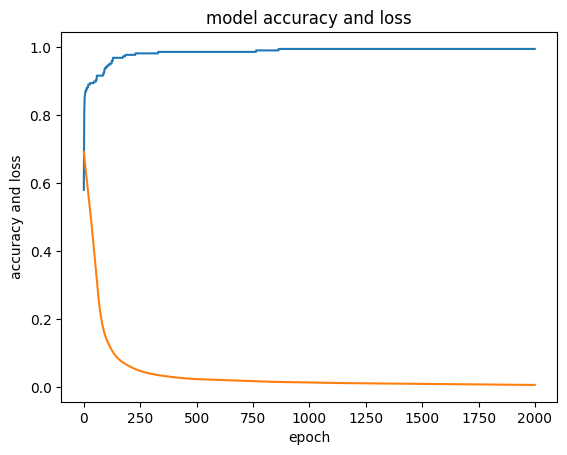

In [ ]:
#visual the models loss and accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')


In [ ]:
print('shape of training data: ', X_train.shape)
print('shape of test data: ',X_test.shape )

shape of training data:  (229, 6)
shape of test data:  (58, 6)


In [ ]:
pred = model.predict(X_test)
pred = [1 if y >= 0.5 else 0 for y in pred] 
pred

print('Original : {0}'.format(", " .join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", " .join(str(x) for x in pred)))

2/2 [==============================] - 0s 3ms/step
Original : 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1
Predicted : 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1
